In [247]:
import numpy as np

import sklearn.datasets

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import sklearn.linear_model

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [248]:
x, y = sklearn.datasets.make_moons(noise=1.0)

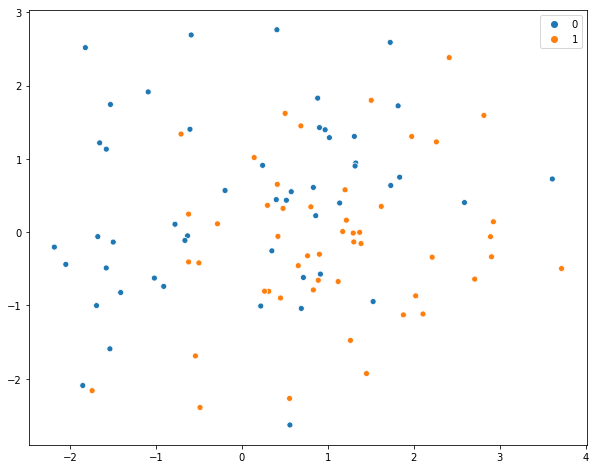

In [249]:
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y)

In [250]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(x, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [251]:
# Helper function to plot a decision boundary.
# credit to Denny Britz @ http://www.wildml.com/ for this utility function
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)


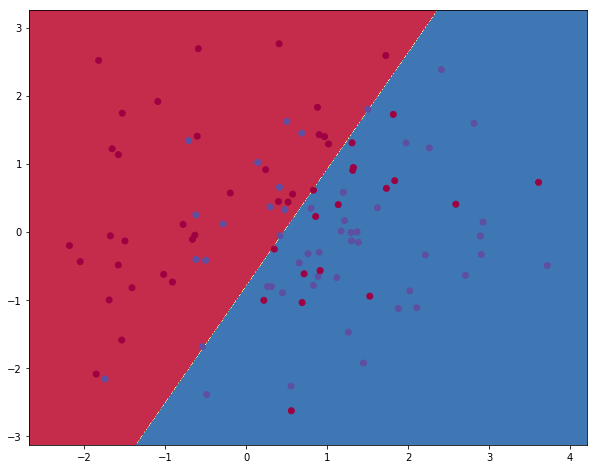

In [252]:
plot_decision_boundary(lambda x: clf.predict(x))

In [253]:
# we want to take input data x, apply weights W1, add our input bias B1, and apply our input layer 
# activation function element wise to this data, this value a1 is passed to our hidden layer

# we want to take the received input a1, apply weights W2, and our hidden layer bias B2, and apply our hidden layer
# activation function element wise to this data

In [285]:
class three_layer_NN_classifier:
    
    def __init__(self, x, y, epsilon=0.01, lambda_=0.01, hidden_dim=4, num_epochs=100):
        # fit model to given data 
        self.epsilon = epsilon
        self.lambda_ = lambda_
        self.num_epochs = num_epochs
        self.m = x.shape[0]
        np.random.seed(0)
        # initialize input layer weights to an m x n dimensional matrix, 
        # where m = number of features in data set, and n = number of nodes
        # in hidden layer
        num_input_features = x.shape[1]
        self.W1 = np.random.randn(num_input_features, hidden_dim)
        # B1 should be a vector of the length of the number of hidden nodes, will
        # be broadcast across z1, applied to each row
        self.B1 = np.zeros((1, hidden_dim))
        # initialize hidden layer weights to an m x n dimensional matrix,
        # where m = number of features of a1, where a1 is data sent from input layer
        # and n = number of nodes in the output layer
        num_a1_features = self.W1.shape[1]
        num_output_nodes = 2
        self.W2 = np.random.randn(num_a1_features, num_output_nodes)
        # B2 should be a vector of the length of the number of hidden nodes, will
        # be broadcast across z2, applied to each row
        self.B2 = np.zeros((1, num_output_nodes))
        self.train_params(x, y)
    
    def train_params(self, x, y):
        for i in range(self.num_epochs):
            if self.loss(x, y) < 0.55:
                print("exiting GD on epoch #", i)
                return
            # apply batch GD, steps will be as follows
            # 1. perform forward propagation, accquire predictions: y_pred
            # 2. compute loss over data set, measure of mismatch between y and y_pred
            # 3. backpropagate errors and update weights of neural network
            z1 = x.dot(self.W1) + self.B1
            a1 = np.tanh(z1)
            
            z2 = a1.dot(self.W2) + self.B2
            exp_z2 = np.exp(z2)
            # compute softmax probabilities for each class
            softmax_prob = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
            
            delta3 = softmax_prob
            # compute difference between softmax probabilities and actual
            # classes, by subtracting one from each row, in the column of
            # the actual class for this input
            delta3[range(self.m), y] -= 1
            # compute partial derivative w.r.t. hidden layer weights
            dW2 = (a1.T).dot(delta3)
            # compute regularization term for hidden layer weights
            regW2 = lambda_ * self.W2
            # compute partial derivative w.r.t. hidden layer bias
            dB2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(self.W2.T) * (1 - np.power(a1, 2))
            # compute partial derivative w.r.t input layer weights
            dW1 = (x.T).dot(delta2)
            # compute regularization term for input layer weights
            regW1 = lambda_ * self.W1
            # compute partial derivative w.r.t. input layer biass
            dB1 = np.sum(delta2, axis=0, keepdims=True)
            
            # update input layer weights/bias
            self.W1 += -epsilon * (dW1 + regW1)
            self.B1 += -epsilon * dB1
            
            # update hidden layer weights/biass
            self.W2 += -epsilon * (dW2 + regW2)
            self.B2 += -epsilon * dB2
        
    def predict(self, x):
        # compute z1, by dotting the input data and input layer weights,
        # we then accquire the hidden layer input data by also applying 
        # the tanh activation function elementwise to z1
        z1 = x.dot(self.W1) + self.B1
        a1 = np.tanh(z1)
        
        # compute z2, by dotting the hidden layer input and hidden layer weights,
        # we then accquire the output layer input data by also applying 
        # the tanh activation function elementwise to z1
        z2 = a1.dot(self.W2) + self.B2
        # we compute softmax, which is the log probabilies for each class
        # as the data sent to our output layer
        exp_z2 = np.exp(z2)
        softmax_prob = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        
        # return the predicted classes for each input, by returning the indices of the
        # highest argument of each row, which corresponds to the class with the highest
        # predicted probability
        return np.argmax(softmax_prob, axis=1)
    
    def loss(self, x, y):
        z1 = x.dot(self.W1) + self.B1
        a1 = np.tanh(z1)

        z2 = a1.dot(self.W2) + self.B2
        exp_z2 = np.exp(z2)
        # compute softmax probabilities for each class
        softmax_prob = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        
        # compute the log of the probabilties for the correct class for each entry
        log_probability = -np.log(softmax_prob[range(self.m), y])
        return 1 / self.m * np.sum(log_probability)

In [367]:
nn_clf = three_layer_NN_classifier(x, y, hidden_dim=3)

In [368]:
print(nn_clf.W1)

[[ 1.65283782  0.91814038  0.48213276]
 [ 2.22686069  1.74479172 -0.59820587]]


In [369]:
nn_clf.loss(x, y)

0.56372406777320083

In [363]:
nn_75_clf = three_layer_NN_classifier(x[0:75], y[0:75], hidden_dim=3)

exiting GD on epoch # 73


In [364]:
print(nn_75_clf.predict(x[75:]))

[0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1]


In [365]:
print(y[75:])

[1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1]


In [366]:
print(np.sum(np.abs(nn_75_clf.predict(x[75:]) - y[75:])))

7
